In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
% pylab inline

Populating the interactive namespace from numpy and matplotlib


* Download tables from HEASARC by using [browse_extract_wget.pl](https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl) version 2a

In [2]:
### Uncomment below for downloading: 
! wget -q -nc https://heasarc.nasa.gov/FTP/heasarc/software/web_batch/browse_extract_wget.pl \
    -O browse_extract_wget.pl

! perl ./browse_extract_wget.pl \
table=xmmmaster \
position='0.,0.' \
radius=100000 \
coordinates=Galactic \
fields=All \
format=Text \
resultmax=100000 \
outfile=xmm-obs-raw.csv

In [3]:
# Final observation file size about 17 Mbytes (17k+ rows)
! wc xmm-obs-raw.csv

   17795   895606 17132785 xmm-obs-raw.csv


In [4]:
# It is written in txt format with '|' separator
! head -6 xmm-obs-raw.csv



Results from xmmmaster
Coordinate system:galactic
|obsid     |status   |name                    |_l       |_b       |time               |duration|pi_lname            |pi_fname        |public_date|data_in_heasarc|bii      |class|distribution_date|end_time           |estimated_exposure|lii      |mos1_mode                                                                          |mos1_num|mos1_time|mos2_mode                                                               |mos2_num|mos2_time|odf_date           |om_mode                                                                                                                             |om_num|om_time|pi_title|pn_mode                                   |pn_num|pn_time|pno   |pps_flag|process_date       |process_status|rgs1_mode                         |rgs1_num|rgs1_time|rgs2_mode       |rgs2_num|rgs2_time|sas_version|scheduled_duration|subject_category                                                                        |xmm_revoluti

In [5]:
# converting to pandas dataset
data = pd.read_csv('xmm-obs-raw.csv', sep='|', header=0, skiprows=4)
data.head()

,Unnamed: 0,obsid,status,name,_l,_b,time,duration,pi_lname,pi_fname,...,rgs1_time,rgs2_mode,rgs2_num,rgs2_time,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset,Unnamed: 47
0,NaN,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,Terrier,Regis,...,41915,SES (1),1,41910,9.0,40039,null ...,2343,3.2294,NaN
1,NaN,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,null,...,null,null,null,null,null,4935,null ...,1056,4.0595,NaN
2,NaN,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,null,...,null,null,null,null,null,4935,null ...,1154,4.0595,NaN
3,NaN,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,Wijnands,Rudy,...,6862,SES (1),1,6861,9.0,4985,null ...,1236,4.0596,NaN
4,NaN,511000401,archived,GC-2,359.94822,-0.04355,2008-09-23T15:15:50,6915,Wijnands,Rudy,...,6912,SES (1),1,6911,9.0,5056,null ...,1610,4.0596,NaN


In [6]:
# Brief descrption of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17790 entries, 0 to 17789
Data columns (total 48 columns):
Unnamed: 0                                                                                                                              0 non-null float64
obsid                                                                                                                                   17790 non-null int64
status                                                                                                                                  17790 non-null object
name                                                                                                                                    17790 non-null object
_l                                                                                                                                      17790 non-null object
_b                                                                                                       

In [7]:
# shorted column names for simplicity
r = []
for col in data.columns:
    r.append(col.replace(' ', ''))
data.columns = r

In [8]:
data.columns

Index(['Unnamed:0', 'obsid', 'status', 'name', '_l', '_b', 'time', 'duration',
       'pi_lname', 'pi_fname', 'public_date', 'data_in_heasarc', 'bii',
       'class', 'distribution_date', 'end_time', 'estimated_exposure', 'lii',
       'mos1_mode', 'mos1_num', 'mos1_time', 'mos2_mode', 'mos2_num',
       'mos2_time', 'odf_date', 'om_mode', 'om_num', 'om_time', 'pi_title',
       'pn_mode', 'pn_num', 'pn_time', 'pno', 'pps_flag', 'process_date',
       'process_status', 'rgs1_mode', 'rgs1_num', 'rgs1_time', 'rgs2_mode',
       'rgs2_num', 'rgs2_time', 'sas_version', 'scheduled_duration',
       'subject_category', 'xmm_revolution', '_offset', 'Unnamed:47'],
      dtype='object')

In [9]:
# Note that are several proposal categories already included to HEASARC data
data['subject_category'].head(10)                                                             

0    null                                          ...
1    null                                          ...
2    null                                          ...
3    null                                          ...
4    null                                          ...
5    White Dwarf Binaries, Neutron Star Binaries, C...
6    null                                          ...
7    White Dwarf Binaries, Neutron Star Binaries, C...
8    null                                          ...
9    X-ray Background and Surveys                  ...
Name: subject_category, dtype: object

In [10]:
# Columns 0 and 47 do not contain any relevant information and are removed:
data.drop([data.columns[0], data.columns[-1]], axis=1, inplace=True)
data.head()

,obsid,status,name,_l,_b,time,duration,pi_lname,pi_fname,public_date,...,rgs1_num,rgs1_time,rgs2_mode,rgs2_num,rgs2_time,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset
0,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,Terrier,Regis,2013-10-05,...,1,41915,SES (1),1,41910,9.0,40039,null ...,2343,3.2294
1,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,null,null,...,null,null,null,null,null,null,4935,null ...,1056,4.0595
2,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,null,null,...,null,null,null,null,null,null,4935,null ...,1154,4.0595
3,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,Wijnands,Rudy,2007-10-05,...,1,6862,SES (1),1,6861,9.0,4985,null ...,1236,4.0596
4,511000401,archived,GC-2,359.94822,-0.04355,2008-09-23T15:15:50,6915,Wijnands,Rudy,2009-11-04,...,1,6912,SES (1),1,6911,9.0,5056,null ...,1610,4.0596


In [11]:
data['subject_category'] = data['subject_category'].apply(lambda x: str(x).rstrip())
categories = data['subject_category'].unique().tolist()
data['category_num'] = data['subject_category'].apply(lambda x: categories.index(x))
data['category_num'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [12]:
print(categories)

['null', 'White Dwarf Binaries, Neutron Star Binaries, Cataclysmic Variables, ULXs and Black Holes', 'X-ray Background and Surveys', 'Supernovae, Supernova Remnants, Diffuse (Galactic) Emission and Isolated Neutron Stars', 'Galaxies and Galactic Surveys', 'Stars, White Dwarfs and Solar System', 'AGN, QSOs and BL-Lacs', 'Groups of Galaxies, Clusters of Galaxies and Superclusters', 'Cosmology, Extragalactic Deep Fields and Area Surveys']


In [13]:
# also, we do not need rgs_* and om_* columns that correspond to instruments we do not use
# we also skip pi_ column that contain last and first name of the proposal PI
rgs_om_list = [i for i in data.columns \
               if i.startswith('rgs') or i.startswith('om_') or i.startswith('pi_')]
data.drop(rgs_om_list, axis=1, inplace=True)
data.head()

,obsid,status,name,_l,_b,time,duration,public_date,data_in_heasarc,bii,...,pno,pps_flag,process_date,process_status,sas_version,scheduled_duration,subject_category,xmm_revolution,_offset,category_num
0,694641101,archived,CMZ-1,0.02002,0.04996,2012-09-24T10:16:44,41918,2013-10-05,Y,0.04996,...,69464,Y,2012-12-26T04:15:50,delivered,9.0,40039,null,2343,3.2294,0
1,302881901,observed,GC-2,359.94823,-0.04356,2005-09-14T20:00:23,null,null,N,-0.04356,...,30288,null,null,null,null,4935,null,1056,4.0595,0
2,302883301,observed,GC-2,359.94823,-0.04356,2006-03-29T04:10:23,null,null,N,-0.04356,...,30288,null,null,null,null,4935,null,1154,4.0595,0
3,302884001,archived,GC-2,359.94822,-0.04355,2006-09-08T16:56:48,6862,2007-10-05,Y,-0.04355,...,30288,Y,2012-12-23T16:22:46,delivered,9.0,4985,null,1236,4.0596,0
4,511000401,archived,GC-2,359.94822,-0.04355,2008-09-23T15:15:50,6915,2009-11-04,Y,-0.04355,...,51100,Y,2012-12-24T13:20:18,delivered,9.0,5056,null,1610,4.0596,0


In [14]:
# Also, the data should be publicly available in HEASARC:
data = data[data['data_in_heasarc'] == data['data_in_heasarc'].unique()[0]]

In [15]:
for col in ['duration', 'mos1_time', 'mos2_time', 'pn_time', '_offset', 'category_num', '_l', '_b']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [16]:
data.describe()

,obsid,_l,_b,duration,class,mos1_time,mos2_time,pn_time,_offset,category_num
count,1.705700e+04,12991.000000,12991.000000,12993.000000,17057.000000,10707.000000,10726.000000,10823.000000,12991.000000,17057.000000
mean,2.525672e+09,187.608415,-0.562253,33317.339644,7842.909832,30082.966844,30151.759277,28944.048415,5194.148618,2.285865
std,3.734692e+09,105.188884,41.582759,32743.428256,2930.842732,27541.329423,27668.332590,27828.406328,2367.422893,2.728147
min,1.101010e+05,0.000000,-89.018080,9.000000,1000.000000,1037.000000,1025.000000,1025.000000,3.229400,0.000000
25%,2.063501e+08,95.870835,-33.045670,11628.000000,5200.000000,11670.000000,11674.000000,10312.500000,3764.292100,0.000000
50%,6.524013e+08,182.215630,-0.617900,22112.000000,9999.000000,21567.000000,21537.000000,19999.000000,5247.521300,0.000000
75%,7.851105e+08,280.279345,32.850920,41412.000000,9999.000000,37363.000000,37426.000000,36001.500000,6971.023100,5.000000
max,9.336000e+09,359.999980,89.583490,146400.000000,9999.000000,144357.000000,144426.000000,142802.000000,10697.446600,8.000000


In [17]:
filtered_data = data[['obsid', 'mos1_time', 'mos2_time', 'pn_time', '_offset', '_l', '_b', 'category_num']]
filtered_data = filtered_data.dropna(axis=0, how='any')
filtered_data.head()

,obsid,mos1_time,mos2_time,pn_time,_offset,_l,_b,category_num
0,694641101,41622.0,41626.0,40041.0,3.2294,0.02002,0.04996,0
3,302884001,6572.0,6577.0,4987.0,4.0596,359.94822,-0.04355,0
4,511000401,4365.0,4350.0,5058.0,4.0596,359.94822,-0.04355,0
5,504940201,12683.0,12689.0,11120.0,4.0596,359.94822,-0.04355,1
6,511000301,6620.0,6627.0,5057.0,4.0596,359.94822,-0.04355,0


In [18]:
# group exposure by off-center angle _offset by making $10^\circ$ bins
dr = 10
filtered_data['raw_offset'] = filtered_data['_offset'].apply(lambda x: math.floor(x/(60.0*dr))*dr)
filtered_data.head()

binned_time = filtered_data.groupby('raw_offset').agg(sum)[['mos1_time', 'mos2_time', 'pn_time']]

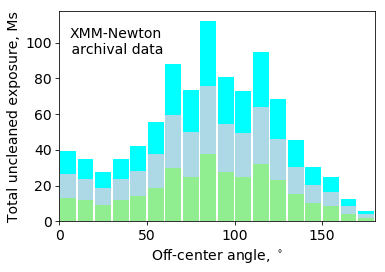

In [19]:
plt.xlim([0., 180.])
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time'] + binned_time['mos2_time'] + binned_time['pn_time']), width=9.0, color='cyan')
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time'] + binned_time['mos2_time']), width=9.0, color='lightblue')
plt.bar(np.array(binned_time.index + 5), 1e-6*np.array(binned_time['mos1_time']), width=9.0, color='lightgreen')
#plt.legend(['pn', 'mos2', 'mos1'])
plt.xlabel('Off-center angle, ${}^\circ$', size=14)
plt.ylabel('Total uncleaned exposure, Ms', size=14)
plt.tick_params(axis ='both', which='major', length=4, labelsize =14, color='black')
plt.tick_params(axis ='both', which='minor', length=0)
plt.figtext(x=0.28, y=0.73, s='XMM-Newton\n archival data', ha='center', size=14, color='black')
plt.subplots_adjust(left=0.15, right=0.88, top=0.88, bottom=0.15)

plt.savefig("xmm-uncleaned-exposure.pdf", format="pdf", transparent=True,rasterized=True,dpi=300, pad_inches=1)

Selecting only requested columns (pointing ID, exposures, coords, category -- cluster, galaxy etc)

In [20]:
filtered_data.head()

,obsid,mos1_time,mos2_time,pn_time,_offset,_l,_b,category_num,raw_offset
0,694641101,41622.0,41626.0,40041.0,3.2294,0.02002,0.04996,0,0
3,302884001,6572.0,6577.0,4987.0,4.0596,359.94822,-0.04355,0,0
4,511000401,4365.0,4350.0,5058.0,4.0596,359.94822,-0.04355,0,0
5,504940201,12683.0,12689.0,11120.0,4.0596,359.94822,-0.04355,1,0
6,511000301,6620.0,6627.0,5057.0,4.0596,359.94822,-0.04355,0,0


In [21]:
filtered_data.groupby('category_num').agg(sum)[['mos1_time', 'mos2_time', 'pn_time']]*1e-6

,mos1_time,mos2_time,pn_time
category_num,,,
0,94.594266,94.462249,91.658810
1,28.536590,28.548938,27.777383
2,7.083155,7.102259,6.448638
3,33.714501,33.768971,32.243434
4,19.837998,19.781839,18.844641
5,31.307413,31.391030,30.138788
6,51.000036,50.990564,49.273321
7,45.824809,45.851557,42.794938
8,7.084860,7.084984,6.873164


In [22]:
filtered_data.to_csv('filtered_data_xmm.csv')
! wc filtered_data_xmm.csv

 10537  10537 817465 filtered_data_xmm.csv
